## **Imports some helpful libraries, most importantly `numpy`**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Auxiliary functions**

### Here are some plotting functions that will come in handy throughout the tutorial. Please define these functions by running the cells below before proceeding with the rest of the exercise.

In [2]:
def plot_likelihood(matrix, title_str = "Likelihood distribution (A)"):
    """
    Plots a 2-D likelihood matrix as a heatmap
    """

    if not np.isclose(matrix.sum(axis=0), 1.0).all():
      raise ValueError("Distribution not column-normalized! Please normalize (ensure matrix.sum(axis=0) == 1.0 for all columns)")
    
    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(matrix, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
    plt.title(title_str)
    plt.show()


def plot_beliefs(belief_dist, title_str=""):
    """
    Plot a categorical distribution or belief distribution, stored in the 1-D numpy vector `belief_dist`
    """

    if not np.isclose(belief_dist.sum(), 1.0):
      raise ValueError("Distribution not normalized! Please normalize")

    plt.grid(zorder=0)
    plt.bar(range(belief_dist.shape[0]), belief_dist, color='r', zorder=3)
    plt.xticks(range(belief_dist.shape[0]))
    plt.title(title_str)
    plt.show()

# **More complex generative models**

## In this livecoding session we will build a more complicated generative model, with the following goals in mind:

### 1. Demonstrate the unique behavior of active inference agents, as opposed to other agent-based approaches to solving POMDPs (e.g. utility-maximization / reinforcement learning)

### 2. Provide a task example that is more relevant to decision-making research and computational psychiatry.

### 3. Take advantage of the functionalities of `pymdp`, especially the `Agent()` class, to abstract away all the mathematical operations involved with inference and planning under active inference.


## Before we dive into specifying this generative model, we need to talk about _observation modalities_ and _hidden state factors_...


## The data structure we use in `pymdp` to represent different hidden state factors and observation modalities is the `object array` (referred to in other contexts as 'arrays of arrays' or 'jagged/ragged arrays').

## They are no different than standard numpy `ndarrays` (they can arbitrarily multidimensional shape), except for the fact that their contents are unrestricted in terms of type. Their `dtype` is `object`, which means that their elements can be any kind of Python data structure -- including other arrays!

## For those of you coming from a MATLAB background: these object arrays are the equivalent of cell arrays. 

## In `pymdp`, we represent a multi-factor $\mathbf{B}$ array as an object array which has as many elements as there are hidden state factors. So in the case of our Grid-World example, our `B` array would have two sub-arrays, and each would be of shape `(3, 3, 3)`. Therefore, each element `B[i]` of the object array contains the `B` matrix for hidden state factor `i`.

In [4]:
import pymdp
from pymdp import utils
import numpy as np

### Let's set up the dimensionalities of the hidden state factors and the control states

In [5]:
""" Define dimensionalities of the hidden state factors and control state factors """
num_states = [3, 3] # a list of dimensionalities of each hidden state factor
num_factors = len(num_states) # the total number of hidden state factors
num_factors

2

In [6]:
num_controls = [3, 3] # a list of the dimensionalities of each control state factor
num_control_factors = len(num_controls) # the total number of control state factors
num_control_factors

2

In [6]:
""" Build an object array for storing the factor-specific B matrices """
# B = 

' Build an object array for storing the factor-specific B matrices '

### *Solution* 

In [7]:
B = utils.obj_array(num_factors)
B

array([None, None], dtype=object)

## Let's build the $\mathbf{B}$ array, i.e. one $\mathbf{B}$ matrix for each of the two hidden state factors of our new Grid World

<img src="https://drive.google.com/uc?export=view&id=1aABVu57DxisLi9iTzcF0rngm8LQ1B5Uk"/>


In [8]:
for f, ns in enumerate(num_states):
  
  """ Initialize the B matrix for this factor """
  B[f] = np.zeros( (ns, ns, num_controls[f]))

  # MOVE LEFT (or UP)

  """ Fill this out """
  # B[f][...,0] = 
  
  # MOVE RIGHT (or DOWN)
  """ Fill this out """
  # B[f][...,1] = 

  # STAY
  """ Fill this out """
  # B[f][...,2] = 


### *Solution*

In [8]:
for f, ns in enumerate(num_states):
  
    """ Initialize the B matrix for this factor """
    B[f] = np.zeros( (ns, ns, num_controls[f]))

    # MOVE LEFT (or UP)
    B[f][0,0:2,0] = 1.0
    B[f][1,2,0] = 1.0

    # MOVE RIGHT (or DOWN)
    B[f][1,0,1] = 1.0
    B[f][2,1:,1] = 1.0

    # STAY
    B[f][:,:,2] = np.eye(ns)

In [10]:
B[0][:,0,0]

array([1., 0., 0.])

### Plot the B matrix

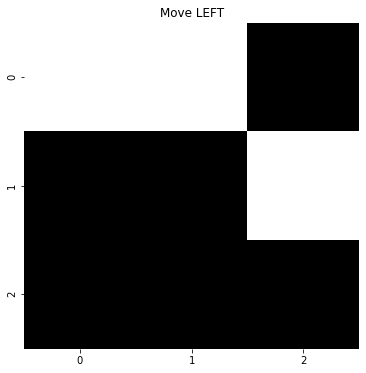

In [10]:
plot_likelihood(B[0][:,:,0], title_str = 'Move LEFT')

In [18]:
B[0][2,:,2].sum()

IndexError: index 3 is out of bounds for axis 2 with size 3

## Now for the $\mathbf{A}$ array...

### Let's start by specifying a single observation modality - the observation of one's own location, or $o^{Loc}$.

<img src="https://drive.google.com/uc?export=view&id=1cUkRY22yeIZdA6kyBO4mKB6jaXQeVpNo"/>


In [11]:
num_obs = [9]
num_modalities = len(num_obs) 
num_modalities

1

In [12]:
A = utils.obj_array(num_modalities)

A_location_dims = num_obs + num_states

In [13]:
A_location_dims

[9, 3, 3]

In [14]:
A[0] = np.zeros(A_location_dims)
A[0].shape

(9, 3, 3)

### Now fill out the entries of the $\mathbf{A}$ matrix

In [ ]:
""" Fill out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 0 """
# A[0][...] = 

""" Fill out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 1 """
# A[0][...] =  

""" Fill out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 2 """
# A[0][...] =  

### *Solution*

In [ ]:
""" filling out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 0 """
A[0][0:3,:,0] = np.eye(3)

""" filling out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 1 """
A[0][3:6,:,1] = np.eye(3)

""" filling out the mapping to 9-dimensional observations for the three possible settings of X (0, 1, 2), in the case we're in Y = 2 """
A[0][6:9,:,2] = np.eye(3)

### Now display the $\mathbf{A}$ matrices we just made

In [ ]:
plot_likelihood(A[0][:,:,0], title_str = "P(o | x, y == 0)" )

In [ ]:
plot_likelihood(A[0][:,:,1], title_str = "P(o | x, y == 1)" )

In [ ]:
plot_likelihood(A[0][:,:,2], title_str = "P(o | x, y == 1)" )

# **Explore/exploit task with a epistemic two-armed bandit**

## Now we're going to build a generative model for an active inference agent playing a two-armed bandit task. The [multi-armed bandit](https://en.wikipedia.org/wiki/Multi-armed_bandit) is a classic decision-making task that captures the core features of the the "explore/exploit tradeoff". This problem formulation is ubiqutious across various disciplines that study decision-making under uncertainty, including economics, neuroscience, machine learning, and engineering.

## The agent has to make choices among mutually exclusive alternatives or 'arms' in order maximize rewards, which issue probabilistically from each arm. However, the reward statistics of each arm are in general unknown or only partially known. The agent must entertain _beliefs_ about the reward statistics. 

## The inherently partial-observability  of the ask creates a conflict between **exploitation** or choosing the arm that is _currently believed_ to be most rewarding, and **exploration** or gathering information about the remaining arms, in the hopes of discovering a potentially more rewarding option.

## The fact that expected reward or utility is contextualized by _beliefs_ -- i.e. which arm is currently thought to be the most rewarding -- motivates the use of active inference in this context. This is because the key objective function for action-selection, the expected free energy $\mathbf{G}$, depends on the agent's beliefs about the world. And not only that, but expected free energy balances the desire to maximize rewards with the drive to resolve uncertainty about unknown parts of the agent's model. The more accurate the agent's beliefs are, the more faithfully decision-making can be guided by maximizing expected utility or rewards.


### Specify the dimensionalities of the hidden state factors, the control factors, and the observation modalities

In [4]:
context_names = ['Left-Better', 'Right-Better']
choice_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

""" Define `num_states` and `num_factors` below """
num_states = [len(context_names), len(choice_names)]
num_factors = len(num_states)

context_action_names = ['Do-nothing']
choice_action_names = ['Move-start', 'Get-hint', 'Play-left', 'Play-right']

""" Define `num_controls` below """
num_controls = [len(context_action_names), len(choice_action_names)]

hint_obs_names = ['Null', 'Hint-left', 'Hint-right']
reward_obs_names = ['Null', 'Loss', 'Reward']
choice_obs_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(hint_obs_names), len(reward_obs_names), len(choice_obs_names)]
num_modalities = len(num_obs)

### *Solution* 

In [5]:
context_names = ['Left-Better', 'Right-Better']
choice_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

""" Define `num_states` and `num_factors` below """
num_states = [len(context_names), len(choice_names)]
num_factors = len(num_states)

context_action_names = ['Do-nothing']
choice_action_names = ['Move-start', 'Get-hint', 'Play-left', 'Play-right']

""" Define `num_controls` below """
num_controls = [len(context_action_names), len(choice_action_names)]

hint_obs_names = ['Null', 'Hint-left', 'Hint-right']
reward_obs_names = ['Null', 'Loss', 'Reward']
choice_obs_names = ['Start', 'Hint', 'Left Arm', 'Right Arm']

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(hint_obs_names), len(reward_obs_names), len(choice_obs_names)]
num_modalities = len(num_obs)

## Create the $\mathbf{A}$ arrays first

In [6]:
""" Generate the A array """
A = utils.obj_array( num_modalities )

## Fill out the hint modality, a sub-array of `A` which we'll call `A_hint`

<img src="https://drive.google.com/uc?export=view&id=1SqMp77NAmUa_oh925VURJ1Hyp8v_fXOj"/>



In [7]:
p_hint = 0.7 # accuracy of the hint, according to the agent's generative model (how much does the agent trust the hint?)

A_hint = np.zeros( (len(hint_obs_names), len(context_names), len(choice_names)) )

for choice_id, choice_name in enumerate(choice_names):

  if choice_name == 'Start':

    A_hint[0,:,choice_id] = 1.0
  
  elif choice_name == 'Hint':

    A_hint[1:,:,choice_id] = np.array([[p_hint,       1.0 - p_hint],
                                      [1.0 - p_hint,  p_hint]])
  elif choice_name == 'Left Arm':

    A_hint[0,:,choice_id] = 1.0
  
  elif choice_name == 'Right Arm':

    A_hint[0,:,choice_id] = 1.0
  
A[0] = A_hint

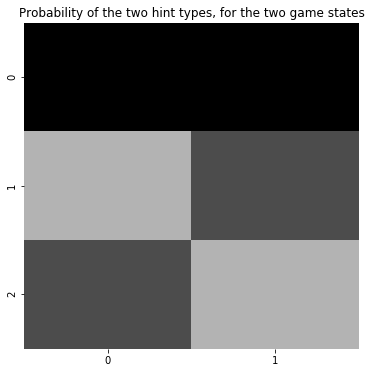

In [8]:
plot_likelihood(A[0][:,:,1], title_str = "Probability of the two hint types, for the two game states")

## Fill out the reward modality, a sub-array of `A` which we'll call `A_rew`

<img src="https://drive.google.com/uc?export=view&id=155LAPZ9_aulJ3YYZwwlOWrEa6unabHht"/>

In [9]:
p_reward = 0.8 # probability of getting a rewarding outcome, if you are sampling the more rewarding bandit

A_reward = np.zeros((len(reward_obs_names), len(context_names), len(choice_names)))

for choice_id, choice_name in enumerate(choice_names):

  if choice_name == 'Start':

    A_reward[0,:,choice_id] = 1.0
  
  elif choice_name == 'Hint':

    A_reward[0,:,choice_id] = 1.0
  
  elif choice_name == 'Left Arm':

    A_reward[1:,:,choice_id] = np.array([ [1.0-p_reward, p_reward], 
                                        [p_reward, 1.0-p_reward]])
  elif choice_name == 'Right Arm':

    A_reward[1:, :, choice_id] = np.array([[ p_reward, 1.0- p_reward], 
                                         [1- p_reward, p_reward]])
  
A[1] = A_reward

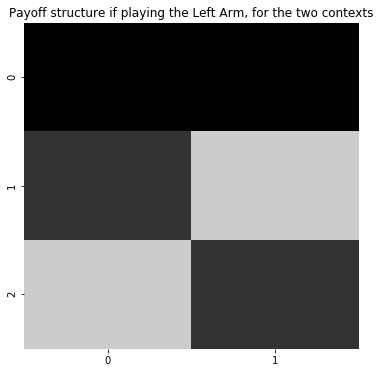

In [10]:
plot_likelihood(A[1][:,:,2], 'Payoff structure if playing the Left Arm, for the two contexts')

## Fill out the choice observation modality, a sub-array of `A` which we'll call `A_choice`

<img src="https://drive.google.com/uc?export=view&id=1LGdGX0TgesvQ2HDnHMg42XHh0n6ZKnHw"/>


In [11]:
A_choice = np.zeros((len(choice_obs_names), len(context_names), len(choice_names)))

for choice_id in range(len(choice_names)):

  A_choice[choice_id, :, choice_id] = 1.0

A[2] = A_choice

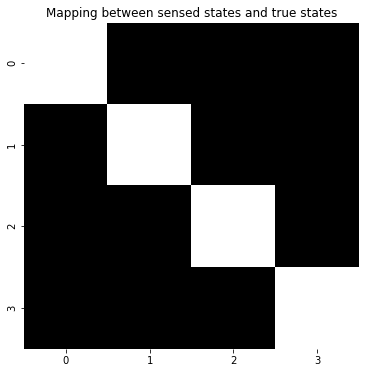

In [12]:
""" Condition on context (first hidden state factor) and display the remaining indices (outcome and choice state) """

plot_likelihood(A[2][:,0,:], "Mapping between sensed states and true states")

## Now let's move onto the $\mathbf{B}$ arrays

In [13]:
B = utils.obj_array(num_factors)

### Fill out the context state factor dynamics, a sub-array of `B` which we'll call `B_context`

<img src="https://drive.google.com/uc?export=view&id=1_VvkCpRu1wWwEFiAJKnOGAGikd5KeiiE" width="600" height="300" />


In [14]:
B_context = np.zeros( (len(context_names), len(context_names), len(context_action_names)) )

B_context[:,:,0] = np.eye(len(context_names))

B[0] = B_context

### Fill out the choice factor dynamics, a sub-array of `B` which we'll call `B_choice`

<img src="https://drive.google.com/uc?export=view&id=1qeuFvNIrJR7ldjpkrB6_jAp6JM3UhMw0"/>


In [15]:
B_choice = np.zeros( (len(choice_names), len(choice_names), len(choice_action_names)) )

for choice_i in range(len(choice_names)):
  
  B_choice[choice_i, :, choice_i] = 1.0

B[1] = B_choice

## The $\mathbf{C}$ vectors

In [16]:
""" Explain `obj_array_zeros` and how you don't have to populate them necessarily """
C = utils.obj_array_zeros(num_obs)

In [17]:
num_obs

[3, 3, 4]

In [18]:
C

array([array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0., 0.])],
      dtype=object)

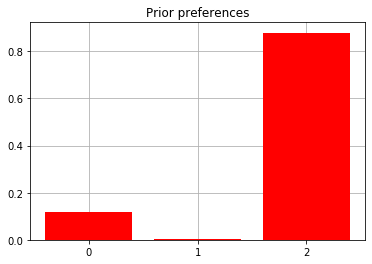

In [19]:
from pymdp.maths import softmax

C_reward = np.zeros(len(reward_obs_names))
C_reward[1] = -4.0 
C_reward[2] = 2.0 

C[1] = C_reward

plot_beliefs(softmax(C_reward), title_str = "Prior preferences")

## The $\mathbf{D}$ vectors

In [20]:
D = utils.obj_array(num_factors)

In [21]:
D_context = np.array([0.5,0.5])

D[0] = D_context

D_choice = np.zeros(len(choice_names))

D_choice[choice_names.index("Start")] = 1.0

D[1] = D_choice


In [22]:
print(f'Beliefs about which arm is better: {D[0]}')
print(f'Beliefs about starting location: {D[1]}')

Beliefs about which arm is better: [0.5 0.5]
Beliefs about starting location: [1. 0. 0. 0.]


## Now let's take advantage of the `Agent` class in `pymdp` to wrap this all into an Agent instance that we can use to do active inference in a few lines.

In [23]:
from pymdp.agent import Agent

my_agent = Agent(A = A, B = B, C = C, D = D)

## Define a class for the 2-armed bandit environment (AKA the _generative process_)

In [24]:
class TwoArmedBandit(object):

  def __init__(self, context = None, p_hint = 1.0, p_reward = 0.8):

    self.context_names = ["Left-Better", "Right-Better"]

    if context == None:
      self.context = self.context_names[utils.sample(np.array([0.5, 0.5]))] # randomly sample which bandit arm is better (Left or Right)
    else:
      self.context = context

    self.p_hint = p_hint
    self.p_reward = p_reward

    self.reward_obs_names = ['Null', 'Loss', 'Reward']
    self.hint_obs_names = ['Null', 'Hint-left', 'Hint-right']

  def step(self, action):

    if action == "Move-start":
      observed_hint = "Null"
      observed_reward = "Null"
      observed_choice = "Start"
    elif action == "Get-hint":
      if self.context == "Left-Better":
        observed_hint = self.hint_obs_names[utils.sample(np.array([0.0, self.p_hint, 1.0 - self.p_hint]))]
      elif self.context == "Right-Better":
        observed_hint = self.hint_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_hint, self.p_hint]))]
      observed_reward = "Null"
      observed_choice = "Hint"
    elif action == "Play-left":
      observed_hint = "Null"
      observed_choice = "Left Arm"
      if self.context == "Left-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_reward, self.p_reward]))]
      elif self.context == "Right-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, self.p_reward, 1.0 - self.p_reward]))]
    elif action == "Play-right":
      observed_hint = "Null"
      observed_choice = "Right Arm"
      if self.context == "Right-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, 1.0 - self.p_reward, self.p_reward]))]
      elif self.context == "Left-Better":
        observed_reward = self.reward_obs_names[utils.sample(np.array([0.0, self.p_reward, 1.0 - self.p_reward]))]
    
    obs = [observed_hint, observed_reward, observed_choice]

    return obs
  

In [25]:
obs_label = ["Null", "Reward", "Left Arm"]  # agent observes itself seeing a `Null` hint, getting a `Null` reward, and seeing itself in the `Start` location
obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]

### Write a function that will take the agent, the environment, and a time length and run the active inference loop

In [26]:
def run_active_inference_loop(my_agent, my_env, T = 5):

  """ Initialize the first observation """
  obs_label = ["Null", "Null", "Start"]  # agent observes itself seeing a `Null` hint, getting a `Null` reward, and seeing itself in the `Start` location
  obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]
  
  for t in range(T):
    qs = my_agent.infer_states(obs)
    plot_beliefs(qs[0], title_str = f"Beliefs about the context at time {t}")

    q_pi, efe = my_agent.infer_policies()
    chosen_action_id = my_agent.sample_action()

    movement_id = int(chosen_action_id[1])

    choice_action = choice_action_names[movement_id]

    obs_label = my_env.step(choice_action)

    obs = [hint_obs_names.index(obs_label[0]), reward_obs_names.index(obs_label[1]), choice_obs_names.index(obs_label[2])]

    print(f'Action at time {t}: {choice_action}')
    print(f'Reward at time {t}: {obs_label[1]}')


In [28]:
q_pi, efe = my_agent.infer_policies()

In [37]:
my_agent.action

array([0., 3.])

In [33]:
my_agent.policies

[array([[0, 0]]), array([[0, 1]]), array([[0, 2]]), array([[0, 3]])]

### Now all we have to do is define the two-armed bandit environment, choose the length of the simulation, and run the function we wrote above.


*   Try playing with the hint accuracy and/or reward statistics of the environment - remember this is _different_ than the agent's representation of the reward statistics (i.e. the agent's generative model, e.g. the A or B matrices).




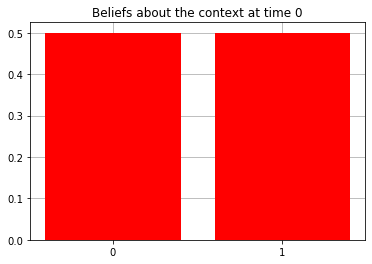

Action at time 0: Get-hint
Reward at time 0: Null


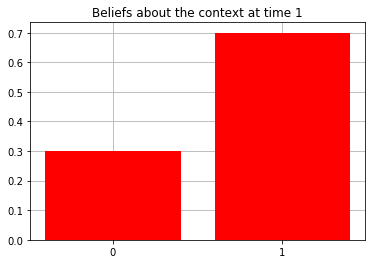

Action at time 1: Get-hint
Reward at time 1: Null


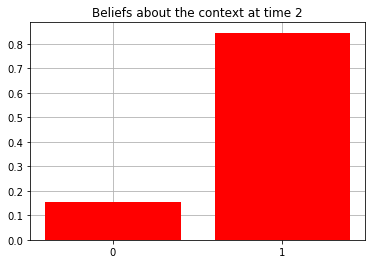

Action at time 2: Play-right
Reward at time 2: Reward


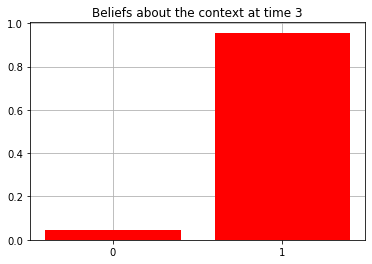

Action at time 3: Play-right
Reward at time 3: Reward


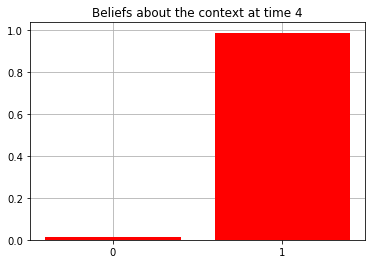

Action at time 4: Play-right
Reward at time 4: Reward


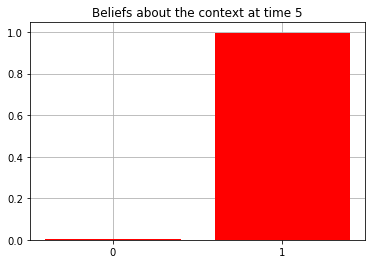

Action at time 5: Play-right
Reward at time 5: Loss


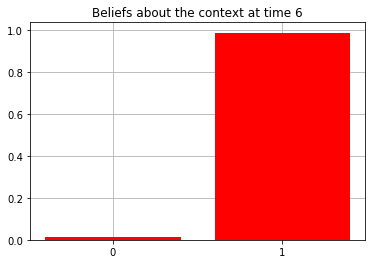

Action at time 6: Play-right
Reward at time 6: Reward


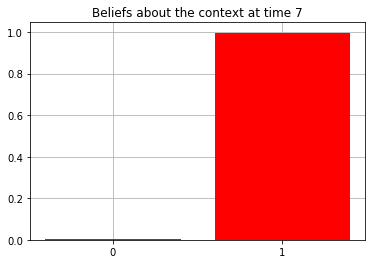

Action at time 7: Play-right
Reward at time 7: Reward


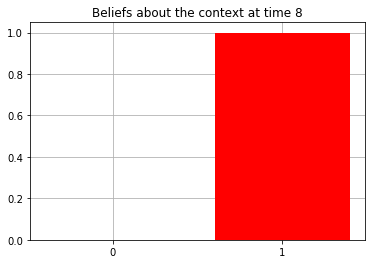

Action at time 8: Play-right
Reward at time 8: Reward


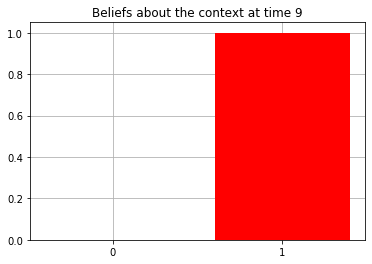

Action at time 9: Play-right
Reward at time 9: Reward


In [27]:
p_hint_env = 1.0 # this is the "true" accuracy of the hint - i.e. how often does the hint actually signal which arm is better. REMEMBER: THIS IS INDEPENDENT OF HOW YOU PARAMETERIZE THE A MATRIX FOR THE HINT MODALITY
p_reward_env = 0.7 # this is the "true" reward probability - i.e. how often does the better arm actually return a reward, as opposed to a loss. REMEMBER: THIS IS INDEPENDENT OF HOW YOU PARAMETERIZE THE A MATRIX FOR THE REWARD MODALITY
env = TwoArmedBandit(p_hint = p_hint_env, p_reward = p_reward_env)

T = 10

# my_agent = Agent(A = A, B = B, C = C, D = D) # in case you want to re-define the agent, you can run this again

run_active_inference_loop(my_agent, env, T = T)

### Let's manipulate the agent's prior preferences over reward observations ($\mathbf{C}[1]$) in order to examine the tension between exploration and exploitation.

In [ ]:
"""If there's time, do this exercise"""

# mess with the 'shape' of the agent's reward function
#C[1] = 

my_agent = Agent(A = A, B = B, C = C, D = D) # redefine the agent with the new preferences
env = TwoArmedBandit(p_hint = 0.8, p_reward = 0.8) # re-initialize the environment -- this time, the hint is not always accurate (`p_hint = 0.8`)

run_active_inference_loop(my_agent, env, T = T)